In [1]:
# Parameter Exstimation
# Georgi Tancev

import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['font.size'] = 6.0
plt.rcParams['axes.titlesize'] = 6.0

from math import *
from numpy import *
from scipy import *
from scipy.integrate import *
from scipy.optimize import *

In [2]:
## Create data.

t_m = [0, 10, 30, 45, 150, 600, 1000, 1500, 2000] # measured time points
c_A_1 = np.array([0.0,0.26810943,0.71118938,0.97622488,1.89920956,2.22123022,2.22221643,2.22222221,2.22222222])
noise = np.random.normal(0, 0.10, 9)
c_A_1_m = c_A_1 + noise # measured concentration for A in reactor 1 with noise

In [3]:
## Define model.

# A -> B, k1

Q = 0.01; # m**3 s**-1
V1 = 3.5; # m**3
V2 = 3.0; # m**3
k1_true = 0.01; # s**-1 --> unknown in this case
cA_0 = 10; # mol m**-3 

def cascade(c,t,k1,Q,V1,V2,cA_0):
    cA_1, cA_2, cB_1, cB_2 = c
    dcA_1 = Q/V1*cA_0 - Q/V1*cA_1 - k1*cA_1
    dcA_2 = Q/V2*cA_1 - Q/V2*cA_2 - k1*cA_2
    dcB_1 =           - Q/V1*cB_1 + k1*cA_1
    dcB_2 = Q/V2*cB_1 - Q/V2*cB_2 + k1*cA_2
    dcdt = [dcA_1, dcA_2, dcB_1, dcB_2]
    return dcdt;

def leastsquares(k1,args=(t_m,c_A_1_m)):
    
    c0 = [0, 0, 0, 0]
    sol1 = odeint(cascade, c0, t_m,args=(k1,Q,V1,V2,cA_0))
    
    obj = np.sum((c_A_1_m-sol1[:,0])**2,axis=0)
    
    return obj;

In [4]:
# Solve.
res = minimize_scalar(leastsquares);
k1 = res.x

c0 = [0, 0, 0, 0]
t1 = linspace(0,2000,100)
sol1 = odeint(cascade, c0, t1,args=(k1,Q,V1,V2,cA_0))

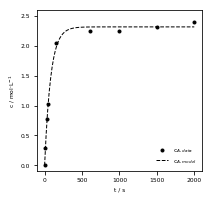

Parameter k_1 was estimated as 0.009 1/s.
The true value of k_1 is 0.010 1/s.


In [6]:
# Plot.

fig = plt.figure(figsize=(2.95,2.95))
ax = fig.add_subplot(111)
plt.plot(t_m, c_A_1_m, '.', label='c$_A$$_,$$_{data}$',color='black')
plt.plot(t1, sol1[:, 0], '--', label='c$_A$$_,$$_{model}$',color='black')
plt.legend(loc=4,frameon=False,fontsize=6)
plt.xlabel('t / s',fontsize=6)
plt.ylabel('c / mol$\cdot$L$^{-1}$',fontsize=6)
#plt.text(1910,0.32,r"k = 0.01 s$^{-1}$",horizontalalignment='center',fontsize=6)
plt.xlim(-100, 2100)     # set the xlim to left, right
plt.ylim(-0.09, 2.59)
ax.tick_params(labelsize=6)
ax.set_xticks((0,500,1000,1500,2000))
plt.savefig('CSTR_cascade_parameter_estimation',dpi=900,transparent=True,orientation='landscape',bbox_inches="tight")
plt.savefig('CSTR_cascade_parameter_estimation',dpi=900,transparent=True,orientation='landscape',bbox_inches="tight",format='pdf')
plt.show()

print('Parameter k_1 was estimated as {:0,.3f}'.format(k1),'1/s.')
print('The true value of k_1 is {:0,.3f}'.format(k1_true),'1/s.')